# Introduction

In this Kernel I will go through cleaning up a dataset, establishing functions and visually displaying my results. From my dataset downloaded from Penn World Tables and other sources I plan to estimate the effect of political stability in a standard growth setting. 

# Import libraries

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statsmodels.formula.api as sm

# The Data

The data is downloaded from Penn World Tables v. 9.0. The additional measures of Government Effectiveness and Political Stability are from World Governance Indicators (WGI). The two datasets have very different structures and in order to make them compatible with eachother I have merged them using VLookup on the country codes in excel. The dataset is therefore not directly from an online source, but has received minimal work in order to make it easily accessible. Furthermore the variables 'pri' and 'sec', which measures the share of population who has completed primary education and secondary education respectively, are from the Barro-Lee dataset and is simply just copy pasted into the excel sheet. 

In [165]:
#Import data
df = pd.read_excel(r"C:\Course-in-programming\Data analysis project 1\datasætudvidele21.xlsx")
df.head()

,countrycode,country,currency_unit,year,rgdpe,gdppc,gdpgr,rgdpo,gdpgro,pop,...,gdpwb90,gdppcwb05,gdpgrwb05,MENA,SSAF,LAC,WEOFF,EECA,SEAS,tradeqog
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see in the head that there is a lot of missing data for Aruba. If we delve deeper into the dataset we will find that this is also the case for many other countries during the 20th century. In this project I am focusing on the last 5 years of data. Most countries are covered and we do not need to constantly remind ourselves that the financial crisis happened, even though the world was still in the aftermath. <br> We see more coherent data now. In order to organize this better I will take a simple mean for the 5 years by country such that we get a cross section format ease the analysis. Additionally I will abandon unnecessary variables.

In [166]:
#Renaming the variables
df.rename(columns={'gdppc':'GDPPerCapita'}, inplace=True)
df.rename(columns={'csh_i':'Investment'}, inplace=True)
df.rename(columns={'popgr':'PopulationGrowth'}, inplace=True)
df.rename(columns={'csh_g':'GovernmentExpenditure'}, inplace=True)
df.rename(columns={'gdpgr':'GDPGrowth'}, inplace=True)
df.rename(columns={'pl_i':'PPI'}, inplace=True)

In [167]:
#Dropping 1950-2010 due to inconsistent data on majority of the variables
indexNames = df[ (df['year'] >= 1950) & (df['year'] <= 2009) ].index   
reduced_df = df
reduced_df.drop(indexNames , inplace=True)

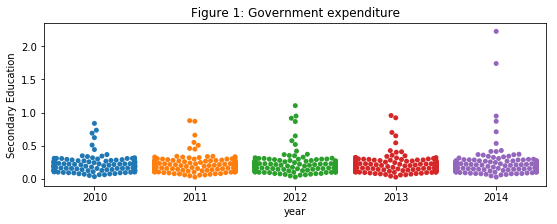

In [187]:
#Swarm plots
def year_plot(y="Investment"): 
    
    fig = plt.figure(figsize=(9,3))
    fig1 = fig.add_subplot(1,1,1)
    fig1 = sns.swarmplot(x ="year", y = y, data=reduced_df)
    if y == "GovernmentExpenditure": 
        fig1.set_title("Figure 1: Government expenditure")
        fig1.set_ylabel("Secondary Education")
    elif y == "Investment": 
        fig1.set_title("Figure 2: Investment")
        fig1.set_ylabel("Investment")
    elif y == "PoliticalStability": 
        fig1.set_title("Figure 3: PoliticalStability")
        fig1.set_ylabel("Political Stability")
    fig1.set_xlabel("year")
    

year_plot("GovernmentExpenditure")

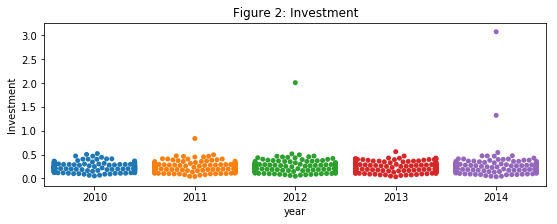

In [169]:
year_plot()

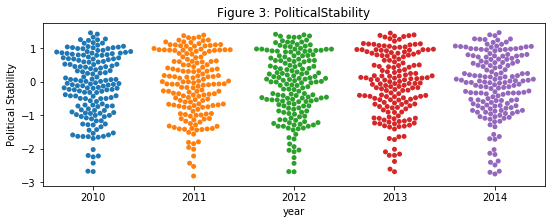

In [170]:
year_plot("PoliticalStability")

In [171]:
#Calculating means for 2010-2014
means = reduced_df.groupby('country')['GDPPerCapita', 'PopulationGrowth', 'Investment', 'GovernmentExpenditure', 'PPI', 'GDPGrowth', 'pri', 'sec', 'GovernmentEffectiveness', 'PoliticalStability'].mean()
means.head()

,GDPPerCapita,PopulationGrowth,Investment,GovernmentExpenditure,PPI,GDPGrowth,pri,sec,GovernmentEffectiveness,PoliticalStability
country,,,,,,,,,,
Albania,9788.448497,-0.002751,0.251874,0.213791,0.513499,0.037583,98.47,80.81,-0.232248,-0.007916
Algeria,13075.719142,0.019205,0.312111,0.314672,0.542972,0.032111,100.00,74.45,-0.517645,-1.267576
Angola,7412.720972,0.033775,0.309847,0.159043,0.575713,0.119323,NaN,NaN,-1.121585,-0.341842
Anguilla,26581.489783,0.012772,0.389223,0.243706,0.571549,-0.011543,NaN,NaN,NaN,NaN
Antigua and Barbuda,20206.664516,0.010440,0.290555,0.281569,0.601805,-0.003356,NaN,NaN,0.377402,0.956358


Given the swarm plots we see that there was two large outliers. One for investments and one for Government expenditure. Let's check them:

In [172]:
means[means['Investment']==means['Investment'].max()]

,GDPPerCapita,PopulationGrowth,Investment,GovernmentExpenditure,PPI,GDPGrowth,pri,sec,GovernmentEffectiveness,PoliticalStability
country,,,,,,,,,,
Cayman Islands,52806.490169,0.017395,1.330508,0.739751,0.90775,-0.017728,NaN,NaN,NaN,NaN


In [173]:
means[means['GovernmentExpenditure']==means['GovernmentExpenditure'].max()]

,GDPPerCapita,PopulationGrowth,Investment,GovernmentExpenditure,PPI,GDPGrowth,pri,sec,GovernmentEffectiveness,PoliticalStability
country,,,,,,,,,,
Turks and Caicos Islands,20880.825023,0.0221,0.597469,0.96758,1.172713,-0.002999,NaN,NaN,NaN,NaN


In [174]:
#Dropping the large variables, as they're unnaturally high.
means = means.drop("Turks and Caicos Islands", axis=0)
means = means.drop('Cayman Islands', axis = 0)

# Analysis

We want to analyse the effect of political stability on growth factors. The index from WGI is based on expert opinions and surveydata and is normalised with a mean of 0. Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically motivated violence. This includes protests and riots, civil war and terrorism. Political instability can reduce incentives to invest given the increase in risk of doing so. It is therefore interesting to see what effect political stability has on investments and education. 

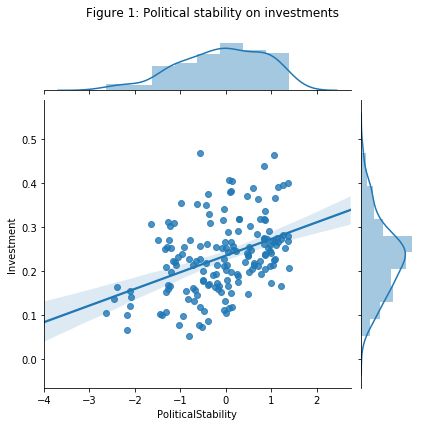

In [175]:
#Jointplot
sns.jointplot(x="PoliticalStability", y="Investment", data=means, kind="reg")
#Working around position of plt.title
plt.subplots_adjust(top=0.9)
plt.suptitle('Figure 4: Political stability on investments', fontsize = 12)
plt.show()

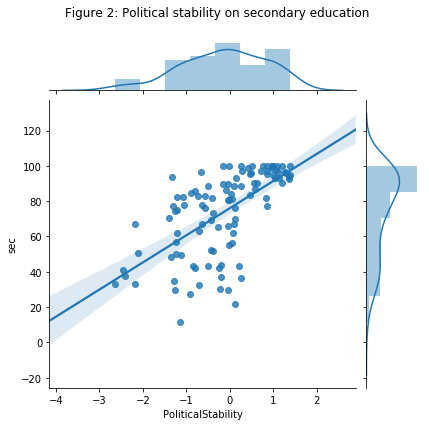

In [176]:
sns.jointplot(x="PoliticalStability", y="sec", data=means, kind="reg")
plt.subplots_adjust(top=0.9)
plt.suptitle('Figure 5: Political stability on secondary education', fontsize = 12)
plt.show()

There's a clear positive relationship between political stability and investments/education. 

Let us see how standard economic growth measures correlate with the investment rate. Investment has been shown to be correlated to economic growth by a sheer amount of studies.

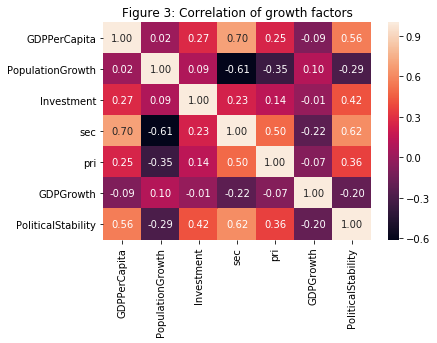

In [177]:
#Defining the title for our correlation matrices
def title_number(x):
    title=f"Figure {x}: Correlation of growth factors"
    return title
#Correlation Matrix
def corr_matrix(data):
    corr = data[['GDPPerCapita', 'PopulationGrowth', 'Investment', 'sec', 'pri', 'GDPGrowth', 'PoliticalStability']].corr()
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f')
    plt.show()

plt.title(title_number())
corr_matrix(means)

As suspected from the plots, we see a large correlation between political stability and eduction and investment. This may suggest that Political Stability influences these growth factors. <br> I want to highlight already established findings. Several articles such as Mankiw (1992) has showed that human capital is a determinant in growth. In addition government expenditure (Barro (1991)) and investments (Levine and Renelt (1992)) has been show to be determinants for growth. A model regressing these factors on growth should confirm previous work. <br> Regarding primary education as a proxy for human capital: Most countries have reached the upper limit of this variable and it is therefore excluded, as the variance in primary education could be caused by exogoneous factors. 

In [178]:
#OLS
result_basic = sm.ols(formula="GDPGrowth ~ PoliticalStability + GovernmentExpenditure + Investment + sec ", data=means).fit()
print(result_basic.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPGrowth   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     9.893
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           8.73e-07
Time:                        16:35:26   Log-Likelihood:                 207.56
No. Observations:                 105   AIC:                            -405.1
Df Residuals:                     100   BIC:                            -391.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.00

First of all we see that there is a suspicion of multicollinearity and therefore we have to be careful to interpret the significance of the results. That said, investments seems to be largely insignificant which may be explained by outliers as mentioned later in the article. Under the assumption that outliers affects the significance we estimate the effects of political stability, secondary education and government expenditure on the investment rate. These factors should affect investment as argued above.

In [179]:
#OLS
result_basic = sm.ols(formula="Investment ~  sec + PoliticalStability + GovernmentExpenditure", data=means).fit()
print(result_basic.summary())

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     6.041
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           0.000796
Time:                        16:35:26   Log-Likelihood:                 141.82
No. Observations:                 105   AIC:                            -275.6
Df Residuals:                     101   BIC:                            -265.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.23

In [180]:
#OLS
result_investment = sm.ols(formula = "sec ~ Investment  + PoliticalStability + GovernmentExpenditure", data=means).fit()
print(result_investment.summary())

                            OLS Regression Results                            
Dep. Variable:                    sec   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     22.51
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           3.07e-11
Time:                        16:35:26   Log-Likelihood:                -454.09
No. Observations:                 105   AIC:                             916.2
Df Residuals:                     101   BIC:                             926.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                66.33

We see that political stability is positively correlated with investments and human capital. Government expenditure seems to be slightly insignifcant at a 10 pct. level when estimating secondary education.<br> We see that investment seems to be uncorrelated with economic growth - which is odd. There is most likely external factors that distorts the relationship. In order to investigate the relationship with a better approach I will exclude the OPEC nations from the analysis, as the growth determined by oil producing countries differ from the rest of the sample and could be regarded as outliers.

In [181]:
#Dropping OPEC nations
means_without_oil = means.drop(['Algeria', 'Indonesia', 'Iran', 'Iraq', 'Kuwait', 'Venezuela', 'Ecuador', 'Congo, D.R.'])
#Gabon, Nigeria, Oman and Saudi Arabia are already dropped from dropping empty variables

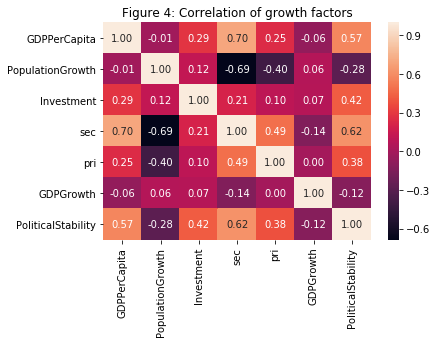

In [182]:
#Correlation matrix
plt.title(title_number(7))
corr_matrix(means_without_oil)

We estimate once more.

In [183]:
result_basic_without_oil = sm.ols(formula="GDPGrowth ~  Investment + sec + PoliticalStability + GovernmentExpenditure", data=means_without_oil).fit()
print(result_basic_without_oil.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPGrowth   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     4.190
Date:                Fri, 05 Apr 2019   Prob (F-statistic):            0.00367
Time:                        16:35:27   Log-Likelihood:                 216.64
No. Observations:                  97   AIC:                            -423.3
Df Residuals:                      92   BIC:                            -410.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.02

In [184]:
result_basic_without_oil = sm.ols(formula="Investment ~  sec + PoliticalStability + GovernmentExpenditure", data=means_without_oil).fit()
print(result_basic_without_oil.summary())

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     5.205
Date:                Fri, 05 Apr 2019   Prob (F-statistic):            0.00229
Time:                        16:35:27   Log-Likelihood:                 132.90
No. Observations:                  97   AIC:                            -257.8
Df Residuals:                      93   BIC:                            -247.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.24

In [185]:
result_basic_without_oil = sm.ols(formula="sec ~  Investment + PoliticalStability + GovernmentExpenditure", data=means_without_oil).fit()
print(result_basic_without_oil.summary())

                            OLS Regression Results                            
Dep. Variable:                    sec   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     25.37
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           4.45e-12
Time:                        16:35:27   Log-Likelihood:                -416.65
No. Observations:                  97   AIC:                             841.3
Df Residuals:                      93   BIC:                             851.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                55.00

With the removal of the OPEC nations we now find that investments looks to be a factor in determining economics growth. Furthermore there is clear indication that government expenditure is related to growth. Furthermore political stability seems to be be negatively correlated with growth and determinants of growth. 